<a href="https://colab.research.google.com/github/j1ayizhao/datascienceA2/blob/main/JiayZhaoU2proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 2 Project: Flipping Metaphorical Coins

**Task**:

Two parts:

1. Propose a data set that's compatible with a pymc betabinomial model. I must approve your submission before you move on to part 2.

2. Create, analyze, and present a betabinomial model using pymc within the colab environment, on a data set of your choice.

In [2]:
!pip install preliz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 700.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.6/505.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 18.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osqp 0.6.7.post0 requires scipy!=1.12.0,>=0.13.2, but you have scipy 1.12.0 which is incompatible.


In [3]:
import preliz as pz

In [4]:
import numpy as np
import arviz as az
import pymc as pm

## **Context**

For my project, I aim to predict the probability that a newly opened food business in the US would close down within its first year of operation.

Food businesses have a lot of bases to cover in order to operate successfully, from funding, marketing, labor and time management, to customer retention. Not to mention, the restaurant industry is notoriously competitive and dynamic, so not only is it a full-time committment and expensive, businesses also need to figure out how to stand out in a saturated market where new restaurants are opening every day.


## **Prior**

I am predicting that the likelihood of a food business in the US failing in its first year is 70%. The main reason for this is because most new restaurants do not turn nearly enough profit, if at all, in their first year to stick it out in the long run. The operational costs will be higher in the first year than any other year, because in addition to recurring fees like rent, utilities, ads, insurance, there's also a significant amount that comes from set-up, like buying all your equipment and hiring employees.

There are also other pitfalls that come from general inexperience of new entrepreneurs. The storefront location can make or break a business (consider foot traffic, accessibility, local competition, etc), you need effective marketing, and also be adaptable to changes within the market. Without thorough planning, any of these factors can easily jeopardize the success of a new food business.

All of the aforementioned reasons contributed to my probability prediction/prior.

I used a beta distribution for my prior:

θ∼Beta(α=60,β=40)


60 as the % of businesses failed, and 40 as the % still open.



<Axes: >

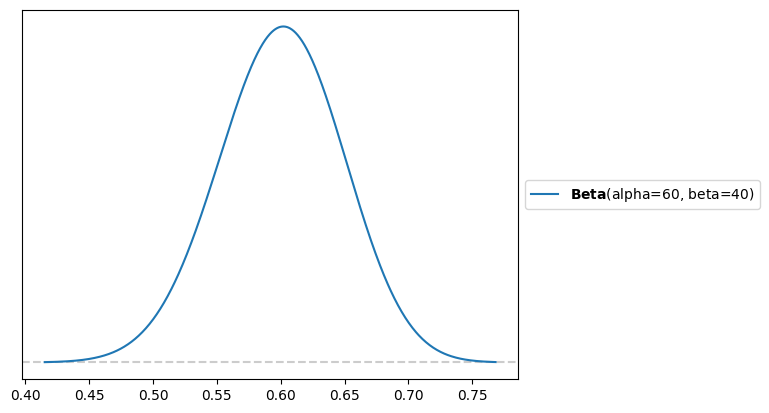

In [9]:
pz.Beta(alpha=60,beta=40).plot_pdf()


## **pymc model**

In [5]:

Startup_makes = np.repeat(0, 434)

Startup_fails = np.repeat(1, 377)

Startups_data = np.concatenate( [Startup_fails, Startup_makes] )

In [6]:


with pm.Model() as startups_model:

  θ = pm.Beta('θ' , alpha = 70. , beta = 30.)

  y = pm.Bernoulli('y', p = θ, observed = Startups_data)

  idata_startups = pm.sample(1000)


In [7]:
import arviz as az

<Axes: title={'center': 'θ'}>

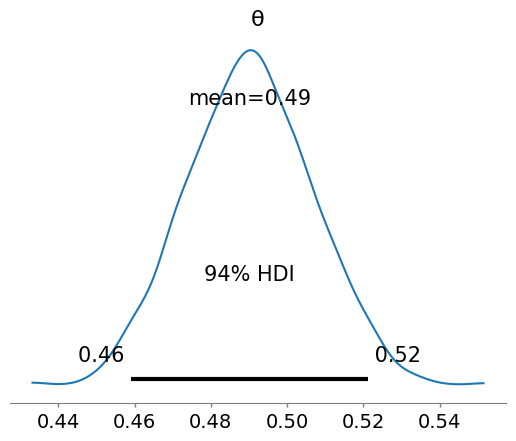

In [8]:
az.plot_posterior(idata_startups)

I graphed my posterior using the betabinomial model. My data set comes from a 2023 food business Yelp listing. On January 2023, there were a total of 811 new food business listings, and by December, 434 of those listings remained.

This brings the 2023 food business failure rate to ~47%, which is fairly close to the mean generated by my posterior. I don't think my model can be used to accurately conclude anything about the actual failure rate of a food business in its first year, given my data comes from one year, but it was pretty close to my prediction.




https://data.yelp.com/business-openings-report-2023#methodology

